# OUTLIERS

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
df=pd.read_csv("D:/Downloads/archive (21)/haberman.csv")
df

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [3]:
df.columns=['patient_age', 'operation_year', 'positive_axillary_nodes', 'survival_status']

In [4]:
df

,patient_age,operation_year,positive_axillary_nodes,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [5]:
df.describe()

,patient_age,operation_year,positive_axillary_nodes,survival_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


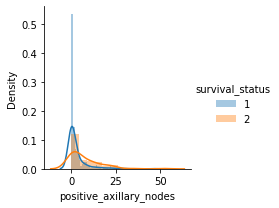

<Figure size 864x432 with 0 Axes>

In [6]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore") 
    g = sns.FacetGrid(df, hue="survival_status")
    g.map(sns.distplot, "positive_axillary_nodes", kde=True)
    g.add_legend()
    plt.figure(figsize=(12,6))
    plt.show()


# Detecting Outliers

# Zscore

In [7]:
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - np.mean(data)) / np.std(data))
    return z_scores > threshold
print(np.where(detect_outliers_zscore(df["positive_axillary_nodes"]))[0])

[  8  61 173 214 251]


# Boxplot

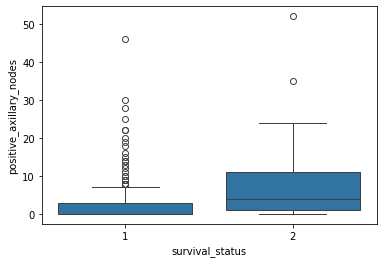

In [8]:
sns.boxplot(x = 'survival_status', y = 'positive_axillary_nodes', data = df) 
plt.show()

# Interquartile Range (IQR) Method

In [9]:
def detect_outliers_iqr(data, threshold=1.5):
    Q1, Q3 = np.percentile(data, [25, 75])
    IQR = Q3 - Q1
    return (data < Q1 - threshold * IQR) | (data > Q3 + threshold * IQR)
print(np.where(detect_outliers_iqr(df["positive_axillary_nodes"]))[0])

[  8  13  21  23  30  42  58  61  65  74  78  84  91  95 105 106 107 123
 135 159 160 166 167 173 176 180 184 187 197 214 222 226 237 239 251 253
 259 260 268 286]


# Remove Outliers

# Imputation

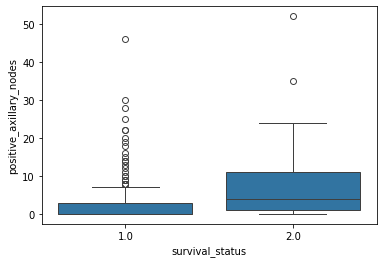

In [10]:
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(df)
colum=['patient_age', 'operation_year', 'positive_axillary_nodes', 'survival_status']
imputed_df = pd.DataFrame(imputed_data, columns=colum)
sns.boxplot(x = 'survival_status', y = 'positive_axillary_nodes', data = imputed_df) 
plt.show()

# Winsorize

Winsorized Data:
[ 3  0  2  4 10  0  0  9 20  1 10  7  0 13  0  1  0  0  0  0  6 15  0 20
  2  0  0  3  1  0 11  1  5  0  0  0  0  2  4  2  0  0 20  0  0  0  8  0
  0  8  0  0  1  0  0  1  2  4 20  0  1 20  2  0  0 14  2  3  0  2  0  4
  6  9 19  0  1  0 16  6  0  1  0  0 14  0  0  1  2  3  5 20  0  3  0 20
  0  0  0  6  0  0  3  4  4 12 11 11  7  8  2  0  0  0 10  1  0  0  1  1
  3  0  1 13  0  0  6  0  1  1  2  0  0  4  1 13  3  7  1  0  1  3  2  3
  4  0  4  0  4  5  0  1  0  0  0  4  1  3  9 20 12  1  1  2  1  0 11 20
  5  7  7  3  0 20  0  7 19  1  0  6 15  1  0  1 18  0  3 20  1  9  3  0
  2  1  0  0  5 14  1  9  0  0  0  0  0  0  0  0  3  1  0  0  3  2 20  0
  0  1  4  0  7  3 17  0  1  2 20  0  5  0  1  0  0  0  8  0  0 13  0 19
  6  0  0  0  1  0  0  0  0  0  9 20  0 20  0  0  0  0  2 20 15  0  0  0
  2  0  1  0 13  0  1  0  8  1  0  0  0  0  0  0  8  0  0  0  0  4 14  0
  0  8  0  2  0  0  0  3  0  0  3  0  1  0  3  1  2]


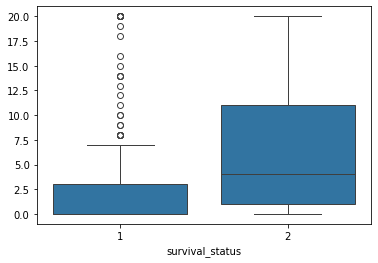

[]


In [11]:
import numpy as np
from scipy.stats.mstats import winsorize

# Winsorize extreme values
winsorized_data = winsorize(df['positive_axillary_nodes'], limits=[0.05, 0.05])

print("Winsorized Data:")
print(winsorized_data)

sns.boxplot(x = 'survival_status', y =winsorized_data, data = df) 
plt.show()

def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - np.mean(data)) / np.std(data))
    return z_scores > threshold
print(np.where(detect_outliers_zscore(winsorized_data))[0])

Trimmed Data:
     patient_age  operation_year  positive_axillary_nodes  survival_status
0           30.0            62.0                      3.0                1
1           30.0            65.0                      NaN                1
2           31.0            59.0                      2.0                1
3           31.0            65.0                      4.0                1
4           33.0            58.0                     10.0                1
..           ...             ...                      ...              ...
300          NaN            62.0                      1.0                1
301          NaN             NaN                      NaN                1
302          NaN            65.0                      3.0                1
303          NaN            65.0                      1.0                2
304          NaN            58.0                      2.0                2

[305 rows x 4 columns]


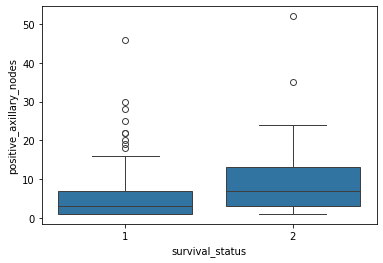

In [12]:
trimmed_data = df[(df > np.percentile(df, 5)) & (df < np.percentile(df, 95))]

print("Trimmed Data:")
print(trimmed_data)
sns.boxplot(x = 'survival_status', y ="positive_axillary_nodes", data = trimmed_data) 
plt.show()

#  

# SKEWNESS  AND KURTOSIS

In [13]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
from scipy.stats import boxcox
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
np.random.seed(0)
data = np.random.gamma(2, scale=2, size=1000)

In [15]:
df = pd.DataFrame(data, columns=['Value'])

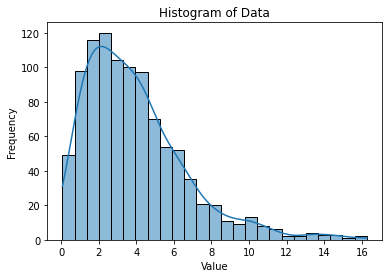

In [16]:
sns.histplot(df['Value'], kde=True)
plt.title('Histogram of Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [17]:
skewness = skew(df['Value'])
kurt = kurtosis(df['Value'])

print("Skewness:", skewness)
print("Kurtosis:", kurt)

Skewness: 1.358332294792333
Kurtosis: 2.4079180806130145


In [18]:
# Handle Skewness and Kurtosis
# Box-Cox Transformation
transformed_data, lambda_value = boxcox(df['Value'])
print("Lambda value for Box-Cox transformation:", lambda_value)

Lambda value for Box-Cox transformation: 0.29396531445691065


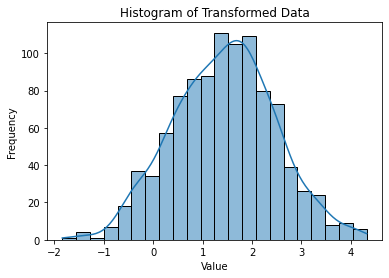

Skewness after transformation: -0.011599377255897552
Kurtosis after transformation: -0.13618493270290521


In [19]:
sns.histplot(transformed_data, kde=True)
plt.title('Histogram of Transformed Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Re-calculate skewness and kurtosis after transformation
skewness_transformed = skew(transformed_data)
kurt_transformed = kurtosis(transformed_data)

print("Skewness after transformation:", skewness_transformed)
print("Kurtosis after transformation:", kurt_transformed)